# 問4.[CNNの可視化3](https://mm.cs.uec.ac.jp/local/homework22.html#3b) CAM / Grad-CAM
- CAM とその改良版の Grad-CAM を使って，認識モデルの認識箇所の可視化してみてください．
- ネットワークは，最後がGAP+FCになっている，<b>ResNet</b>を使うといいでしょう．
- ImageNet pre-trained modelを利用してもらって構いません．(つまり学習しなくていいです．）
- テスト画像はWeb検索などで適当に用意してください．
- 可視化に関しては Qiitaの記事なども見ておいてください．
## 画像認識に関するeXplanable AIの基礎技術です．

以下，ライブラリのtorchcamを利用して実行する．一発では動作せず，再実行して初めて動作した．

In [1]:
!pip install torchcam

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display
import time
import os

os.environ["http_proxy"] = "http://proxy.uec.ac.jp:8080/"
os.environ["https_proxy"] = "http://proxy.uec.ac.jp:8080/"
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1"

In [3]:
# Define your model
from torchvision.models import resnet18
model = resnet18(pretrained=True).eval()

# Set your CAM extractor
from torchcam.methods import SmoothGradCAMpp
cam_extractor = SmoothGradCAMpp(model)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/yanai-lab/higuchi-k/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


In [4]:
!pip install --user --upgrade torchvision

Requirement already up-to-date: torchvision in /host/home/yanai-lab/Sotsuken22/higuchi-k/.local/lib/python3.7/site-packages (0.12.0)


デフォルトでは、CAMが取得されるレイヤーは、最後の非縮小畳み込みレイヤーに設定されていることに注意
- 特定のレイヤーを調査する場合は、コンストラクターでtarget_layer引数を使用
- CAMエクストラクタが設定されると、通常どおり、モデルを使用してデータを推測するだけで済みます
- 追加情報が必要な場合は、エクストラクターが自動的に取得

In [24]:
import torchvision
print(torchvision.__version__)

from torchvision.io.image import read_image
from torchvision.transforms.functional import normalize, resize, to_pil_image
from torchvision.models import resnet18
from torchcam.methods import SmoothGradCAMpp,CAM

model = resnet18(pretrained=True).eval()
#cam_extractor = SmoothGradCAMpp(model)
cam_extractor = CAM(model)
# Get your input
img = read_image("./images/nipple.jpg")
# Preprocess it for your chosen model
input_tensor = normalize(resize(img, (224, 224)) / 255., [0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

# Preprocess your data and feed it to the model
out = model(input_tensor.unsqueeze(0))
# Retrieve the CAM by passing the class index and the model output
activation_map = cam_extractor(out.squeeze(0).argmax().item(), out)

0.12.0+cu102


In [25]:
!python --version

Python 3.7.6


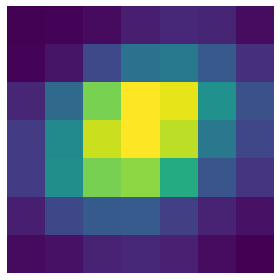

In [26]:
import matplotlib.pyplot as plt
# Visualize the raw CAM
plt.imshow(activation_map[0].squeeze(0).numpy()); plt.axis('off'); plt.tight_layout(); plt.show()

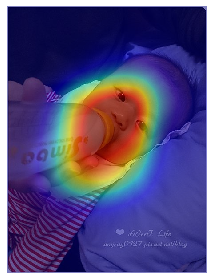

In [27]:
import matplotlib.pyplot as plt
from torchcam.utils import overlay_mask

# Resize the CAM and overlay it
result = overlay_mask(to_pil_image(img), to_pil_image(activation_map[0].squeeze(0), mode='F'), alpha=0.5)
# Display it
plt.imshow(result); plt.axis('off'); plt.tight_layout(); plt.show()

### CAMは対象物体（哺乳瓶）の中央に注目していると分かる．

0.12.0+cu102


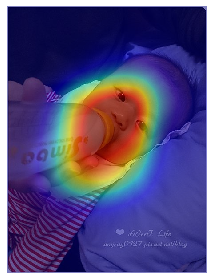

In [28]:
import torchvision
print(torchvision.__version__)

from torchvision.io.image import read_image
from torchvision.transforms.functional import normalize, resize, to_pil_image
from torchvision.models import resnet18
from torchcam.methods import SmoothGradCAMpp,CAM, GradCAM

model = resnet18(pretrained=True).eval()
cam_extractor = GradCAM(model)
#cam_extractor = SmoothGradCAMpp(model)
#cam_extractor = CAM(model)
# Get your input
img = read_image("./images/nipple.jpg")
# Preprocess it for your chosen model
input_tensor = normalize(resize(img, (224, 224)) / 255., [0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

# Preprocess your data and feed it to the model
out = model(input_tensor.unsqueeze(0))
# Retrieve the CAM by passing the class index and the model output
activation_map = cam_extractor(out.squeeze(0).argmax().item(), out)

import matplotlib.pyplot as plt
from torchcam.utils import overlay_mask

# Resize the CAM and overlay it
result = overlay_mask(to_pil_image(img), to_pil_image(activation_map[0].squeeze(0), mode='F'), alpha=0.5)
# Display it
plt.imshow(result); plt.axis('off'); plt.tight_layout(); plt.show()

### Grad-CAMも注目する位置は，CAMと類似しているようであった．